 This script is used to produce Suplementary Figures of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM


## Supplementary Figure 4

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib as mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"

rootDir=rootDir+"pBGT/GIT/"

workingDir=rootDir+"code/Supplementary/"
data_path=rootDir+"data/supplementary/sFig-4/"
#data_path2=rootDir+"data/Figure_3/"
sfig_path=rootDir+"figures/SuppFigures/"

In [4]:

sb_file="pBGT-Sulbactam-gradient-on-LBAMP2k_rowC.txt"

sb_doses=[0,1,2,4,8,16,32,64,128,256,512,1024]
sb_doses=[int(x) for x in sb_doses]
rows="A B C D E F G H"
rows=rows.split()
bg=.089


In [5]:


df_sb = pd.read_csv(data_path + sb_file, sep="\t|\n", skiprows=34, encoding="iso-8859-15", engine='python')
df_sb = df_sb.dropna()


<ipython-input-9-19a5162e3320>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps=plt.cm.get_cmap('BuPu')


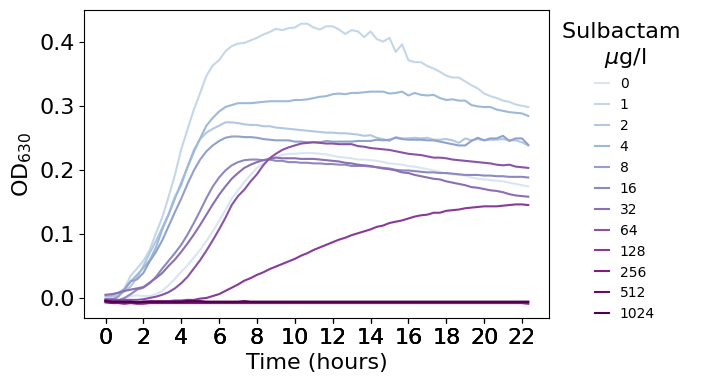

In [9]:
fig=plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')

sb_ods=[]
sbfs=[]
lt=len(df_sb["Time"])
xx=20/60
time=[x*xx for x in range(0,lt,1)]
timex=[int(x*xx) for x in range(0,lt,1)]
timelabels=[x for x in timex if x%2==0]
cmaps=plt.cm.get_cmap('BuPu')
colors = plt.cm.BuPu(np.linspace(0,1,14))


for c in range(1,13):

    key="C"+str(c)
    this_ods=df_sb[key]-bg
    #print(this_ods)
    lbl=sb_doses[c-1]
    #plt.plot(time,this_ods,label=lbl,color=cmaps(c))
    plt.plot(time,this_ods,label=lbl,color=colors[c+1])
    f=list(this_ods)[-1]
    sb_ods.append(this_ods)
    sbfs.append(f)
plt.legend(title="Sulbactam \n      $\mu$g/l",bbox_to_anchor=(1., 1), loc='upper left',framealpha=0.0,handlelength=1,fontsize=10)

plt.xticks(timelabels,labels=timelabels)
plt.xlabel("Time (hours)")#,fontweight="bold")
plt.ylabel("OD$_{630}$")#,fontweight="bold")
#plt.tight_layout()

figname=sfig_path+"sFig-4A.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()




<ipython-input-13-ffa0f716d808>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colourmap = mpl.cm.get_cmap('BuPu')


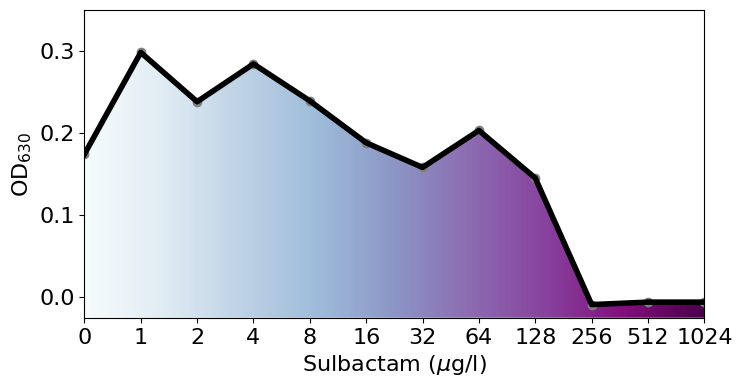

In [13]:
fig = plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')

sb_dosesx=[x for x in range(len(sb_doses))]

y0s=[-0.025 for x in sb_dosesx]
plt.plot(sb_dosesx, sbfs, lw=4, c='k')
plt.scatter(sb_dosesx, sbfs, c='gray')

colourmap = mpl.cm.get_cmap('BuPu')
polygon=plt.fill_between( sb_dosesx,y0s,sbfs,color='none',alpha=0.3)
xlim = plt.xlim()
ylim = plt.ylim()
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = plt.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=colourmap, aspect='auto',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()])
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)

#plt.xscale("symlog")
sb2 = [str(x) for x in sb_doses]
plt.xticks(sb_dosesx, sb2)
#plt.xlim(xmax=2**11, xmin=-0.5)
plt.xlabel("Sulbactam ($\mu$g/l)")#, fontweight="bold")
plt.ylabel("OD$_{630}$")#,fontweight="bold")
plt.ylim(-0.025, 0.35)

figname = sfig_path + "sFig-4B.pdf"
plt.savefig(figname, bbox_inches='tight', pad_inches=0.1)
plt.show()


### LB AMP LB

In [14]:

files=['pBGTx4-G54Ux4-G55Ux4_AMP+SB-AMP_1-LB.txt', 'pBGTx4-G54Ux4-G55Ux4_AMP+SB-AMP_2-AMP.txt', 'pBGTx4-G54Ux4-G55Ux4_AMP+SB-AMP_3-LB.txt']

PS=["D1","C2","D3","C4","F1","F2","F3","F4"]
PC=["B1","E1"]

namesSB=["1 - LB","2 - AMP+SB","3 - LB"]
names=["1 - LB","2 - AMP","3 - LB"]
namesS=["1 - LB","2 - AMP+SB","3 - LB"]
namesL=["1 - LB","2 - LB","3 - LB"]


### Read OD

In [15]:
dflist=[]
for i,this_file in enumerate(files):
    this_file=data_path+this_file
    df=pd.read_csv(this_file,sep='\t',skiprows=45,nrows=37,encoding="iso-8859-15",engine='python')
    times=list(df["Time"])
    this_size=len(times)
    dname=names[i]
    d_list=[dname]*this_size
    #print(df.tail())
    df_temp=pd.DataFrame({"Time":times,"day":d_list})

    df2=pd.merge(df,df_temp, on=["Time"])
    dflist.append(df2)
df_OD=pd.concat(dflist)
df_OD.tail(2)


,Time,T° OD:630,A1,A2,A3,A4,A5,A6,A7,A8,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,day
35,11:40:32,37.0,0.111,0.09,0.086,0.104,0.106,0.116,0.09,0.133,...,0.087,0.087,0.096,0.091,0.096,0.102,0.113,0.088,0.113,3 - LB
36,12:00:32,37.0,0.110,0.09,0.086,0.104,0.105,0.116,0.09,0.133,...,0.087,0.087,0.096,0.090,0.096,0.102,0.113,0.088,0.113,3 - LB


## Read GFP

In [16]:
dflist=[]
for i,this_file in enumerate(files):
    this_file=data_path+this_file
    df=pd.read_csv(this_file,sep='\t',skiprows=86,nrows=37,encoding="iso-8859-15",engine='python')
#    print(df.head())
    #print(df.tail())
    times=list(df["Time"])
    this_size=len(times)
    dname=names[i]
    d_list=[dname]*this_size

    df_temp=pd.DataFrame({"Time":times,"day":d_list})

    df2=pd.merge(df,df_temp, on=["Time"])
    dflist.append(df2)
df_GFP=pd.concat(dflist)
df_GFP.tail(2)



,Time,"T° GFP:479,520",A1,A2,A3,A4,A5,A6,A7,A8,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,day
35,11:41:23,37.0,17014,16984,16703,16662,16551,16228,16129,16163,...,16676,16720,16454,16151,16216,16357,16129,16324,15854,3 - LB
36,12:01:23,37.0,16991,16949,16702,16638,16308,16511,16196,16121,...,16575,16732,16323,16356,16180,16362,16301,16013,16164,3 - LB


## Read GFP/OD

In [17]:
dflist=[]
for i,this_file in enumerate(files):
    this_file=data_path+this_file
    df=pd.read_csv(this_file,sep='\t',skiprows=127,nrows=37,encoding="iso-8859-15",engine='python')
    #print(df.head())
    #print(df.tail())
    times=list(df["Time"])
    this_size=len(times)
    dname=names[i]
    d_list=[dname]*this_size

    df_temp=pd.DataFrame({"Time":times,"day":d_list})

    df2=pd.merge(df,df_temp, on=["Time"])
    dflist.append(df2)
df_GFPOD=pd.concat(dflist)
df_GFPOD.tail(2)


,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,day
35,11:41:23,153834,188293,193098,160366,156585,139656,179410,121985,180793,...,191019,191304,172293,177874,168741,160678,142608,185079,140550,3 - LB
36,12:01:23,154044,188113,193087,160444,154725,142336,180557,121485,182877,...,190956,191223,170921,181330,168717,160885,144257,181759,143044,3 - LB


## Plot OD

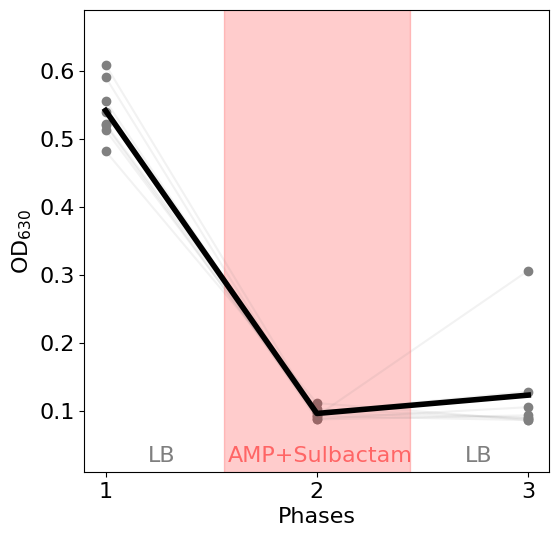

In [18]:
fig=plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')

namesS2=["LB","AMP+Sulbactam","LB"]

df_plt=df_OD.copy()


dfos=[]
for rep in PS:
    fods=[]
    for d,day in enumerate(names):
        subdf=df_plt[df_plt["day"]==day]
        ods=list(subdf[rep])
        #maxod=max(ods)
        fod=ods[-1]
        fods.append(fod)
        plt.scatter(x=d,y=fod,c="gray")
    dfos.append(fods)
    plt.plot([0,1,2],fods,alpha=.1,c="gray")
y0=np.mean([x[0] for x in dfos])
y1=np.mean([x[1] for x in dfos])
y2=np.mean([x[2] for x in dfos])
plt.plot([0,1,2],[y0,y1,y2],c='k',lw=4)
plt.axhspan(ymin=0, ymax=.7, xmin=0.3, xmax=.7,color="red",alpha=0.2)
plt.ylim([0.01,.69])
plt.xticks([0,1,2],labels=[1,2,3])#,labels=namesS)

plt.annotate(namesS2[0],xy=(0+.2,.025),alpha=0.5)
plt.annotate(namesS2[1],xy=(1-.42,.025),alpha=0.5,c='red')
plt.annotate(namesS2[2],xy=(2-.3,.025),alpha=0.5)

plt.ylabel("OD$_{630}$")#,fontweight="bold")
plt.xlabel("Phases")#,fontweight="bold")

figname=sfig_path+"sFig-4C.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


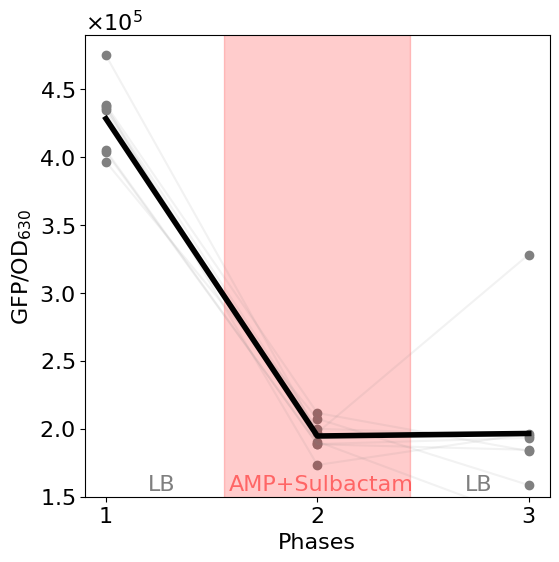

In [19]:
fig=plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')


df_plt=df_GFPOD.copy()


dfos=[]
for rep in PS:
    fods=[]
    for d,day in enumerate(names):
        subdf=df_plt[df_plt["day"]==day]
        ods=list(subdf[rep])
        #maxod=max(ods)
        fod=ods[-1]
        fods.append(fod)
        plt.scatter(x=d,y=fod,c="gray")
    dfos.append(fods)
    plt.plot([0,1,2],fods,alpha=.1,c="gray")
y0=np.mean([x[0] for x in dfos])
y1=np.mean([x[1] for x in dfos])
y2=np.mean([x[2] for x in dfos])
plt.plot([0,1,2],[y0,y1,y2],c='k',lw=4)
plt.xticks([0,1,2],labels=namesS)
plt.axhspan(ymin=0, ymax=500000, xmin=0.3, xmax=.7,color="red",alpha=0.2)
plt.ticklabel_format(axis='y', style="sci", scilimits=(0,0),useMathText=True)
plt.ylim([150000,490000])


plt.xticks([0,1,2],labels=[1,2,3])#,labels=namesS)

plt.annotate(namesS2[0],xy=(0+.2,155000),alpha=0.5)
plt.annotate(namesS2[1],xy=(1-.42,155000),alpha=0.5,c='red')
plt.annotate(namesS2[2],xy=(2-.3,155000),alpha=0.5)

plt.ylabel("GFP/OD$_{630}$")#,fontweight="bold")
plt.xlabel("Phases")#,fontweight="bold")

figname=sfig_path+"sFig-4D.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()